## Hydro-Privacy

### Explored the provided time series data of household water end use

In [ ]:
# import packages
from utils import *
%matplotlib notebook

### Use a pre-trained end use classifier to identify water end uses
#### Mmodel trained using the script "EndUse_Classifier-UpdatedPreTrain_complete.ipynb", model pre-trained for 30 random households with 2 inhabitants and standard fixture efficiency (0)
#### Input time series:
#####   (1) same category, within the training dataset;
#####   (2) same category, not included in the training dataset;
#####   (3) a different category (3 inhabitants, standard fixture efficiency)

In [ ]:
# load the pre-trained model
filename = 'EUclassifier_pre_HH_2_0.sav'
loaded_model =joblib.load(filename)

In [ ]:
loaded_model

LGBMClassifier(learning_rate=0.001, max_depth=3)

In [ ]:
def identify_water_enduse(file_name,loaded_model, endUses = ['Toilet','Shower','Faucet','ClothesWasher', 'Dishwasher'] ):
    allData = pd.read_csv(file_name,index_col=0)
    cfg = read_config('configfiles/config.yaml')
    # Extract end use events and statistics from end use time series
    allEndUseEvents=extractEvents(allData, endUses)
    X = allEndUseEvents[cfg['features']]
    y = allEndUseEvents[cfg['target']]
    X['Duration'] = X['Duration'].astype('float')
    expected_y = y
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    predicted_y = loaded_model.predict(X)
    print(classification_report(expected_y, predicted_y,target_names=endUses))
    print(f"f1_score={f1_score(expected_y, predicted_y, average='micro'):.3f}".expandtabs(30))

    _, ax = get_confusion_matrix(expected_y, predicted_y, plot=True)
    ax.set_title('Confusion Matrix for LGBMClassifier', fontsize=16)


# Our Challenge

In [ ]:
import numpy as np
import tensorflow as tf
import numpy as np
import os
import random
from random import shuffle
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
data=pd.read_csv('../data/800Houses_10s_1month/House_10sec_1month_90.csv')

               precision    recall  f1-score   support

       Toilet       0.19      0.54      0.28        93
       Shower       0.02      0.09      0.03        23
       Faucet       1.00      0.58      0.74      1796
ClothesWasher       0.32      0.97      0.48        39
   Dishwasher       0.42      0.92      0.58       346

     accuracy                           0.63      2297
    macro avg       0.39      0.62      0.42      2297
 weighted avg       0.86      0.63      0.68      2297

f1_score=0.633


<IPython.core.display.Javascript object>


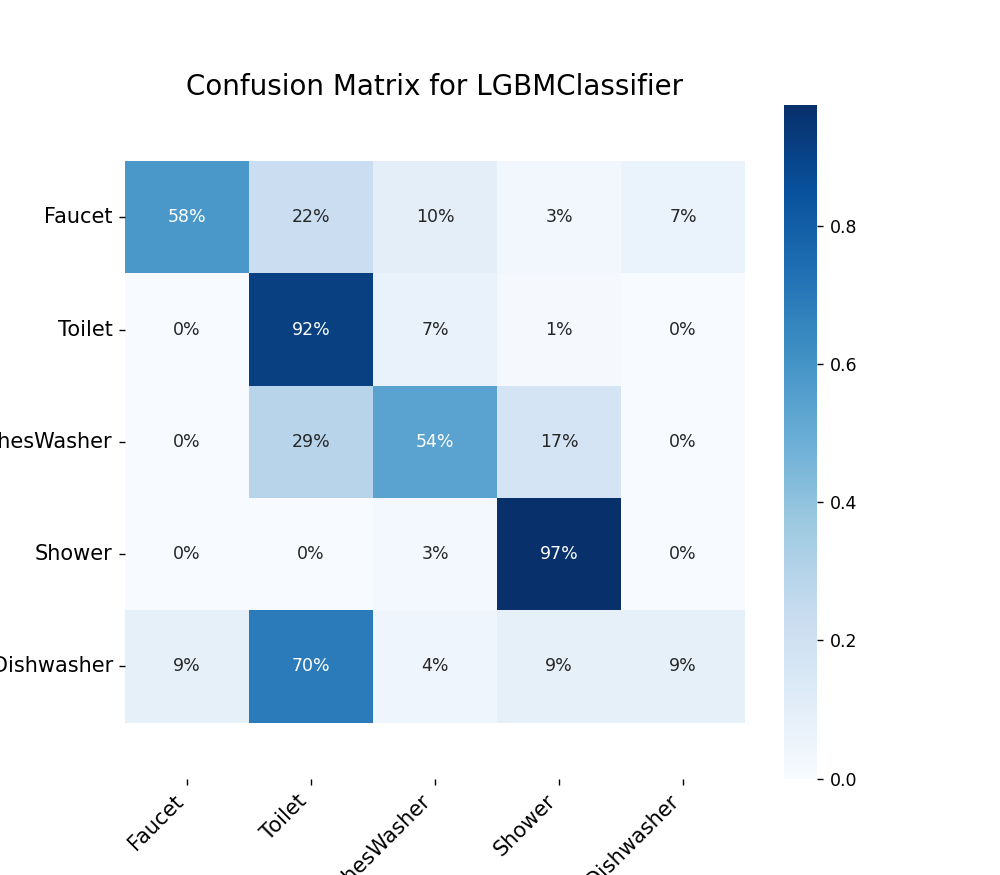

In [ ]:
identify_water_enduse('../data/800Houses_10s_1month/House_10sec_1month_90.csv',loaded_model)

## 1. Shuffle Data

In [ ]:
Sdb1 = data.copy()
Sdb1 = shuffle(Sdb1)
Sdb1.reset_index(inplace=True, drop=True)

<IPython.core.display.Javascript object>


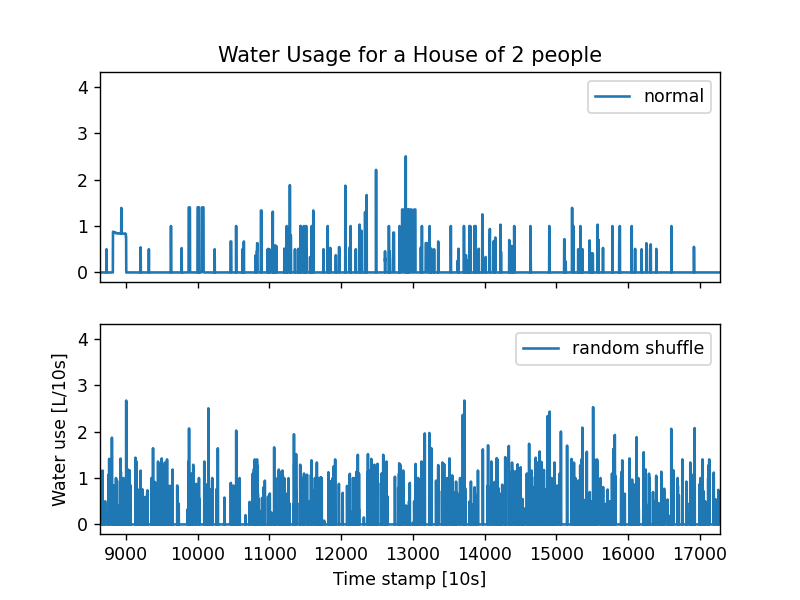

In [ ]:
import matplotlib.dates as mdates
f, (ax1, ax2) = plt.subplots(2,1, sharex=True)
ax1.plot(data['TOTAL'], label='normal')
ax1.set_title('Water Usage for a House of 2 people')
ax2.plot(Sdb1['TOTAL'], label='random shuffle')
ax1.set_xlim([24*360, 48*360]) # zoom to a 24-hour range. here: 0-24 o'clock of the second day
ax2.set_xlabel('Time stamp [10s]')
ax2.set_ylabel('Water use [L/10s]')
ax1.legend(loc="upper right")
ax2.legend(loc="upper right")

<IPython.core.display.Javascript object>


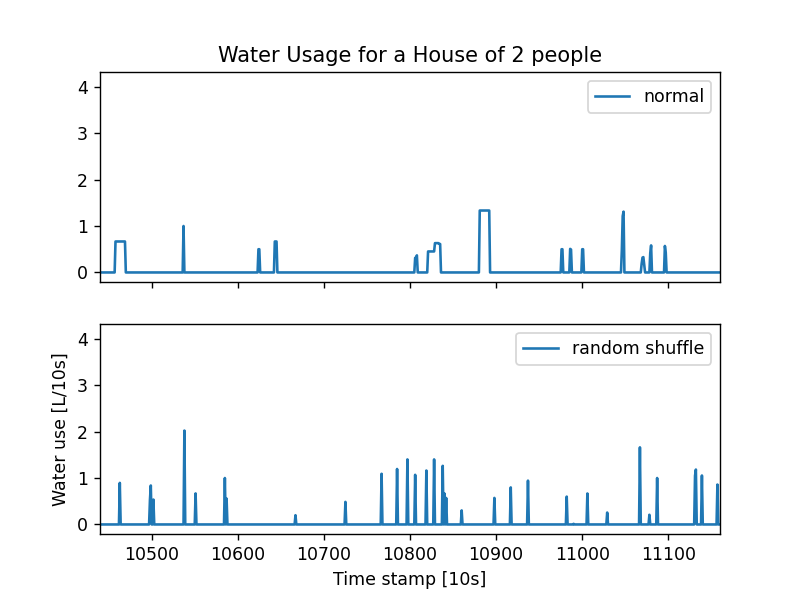

In [ ]:
import matplotlib.dates as mdates
f, (ax1, ax2) = plt.subplots(2,1, sharex=True)
ax1.plot(data['TOTAL'], label='normal')
ax1.set_title('Water Usage for a House of 2 people')
ax2.plot(Sdb1['TOTAL'], label='random shuffle')
ax1.set_xlim([29*360, 31*360]) # zoom to a 2-hour range. here: 5-7 o'clock of the second day
ax2.set_xlabel('Time stamp [10s]')
ax2.set_ylabel('Water use [L/10s]')
ax1.legend(loc="upper right")
ax2.legend(loc="upper right")

In [ ]:
Sdb1.to_csv('random_shuffle.csv')

               precision    recall  f1-score   support

       Toilet       0.22      0.62      0.33      1367
       Shower       0.15      0.28      0.19       180
       Faucet       0.71      0.81      0.75      6117
ClothesWasher       0.09      0.01      0.01      2273
   Dishwasher       0.00      0.00      0.00      1495

     accuracy                           0.51     11432
    macro avg       0.23      0.35      0.26     11432
 weighted avg       0.42      0.51      0.45     11432

f1_score=0.514


<IPython.core.display.Javascript object>


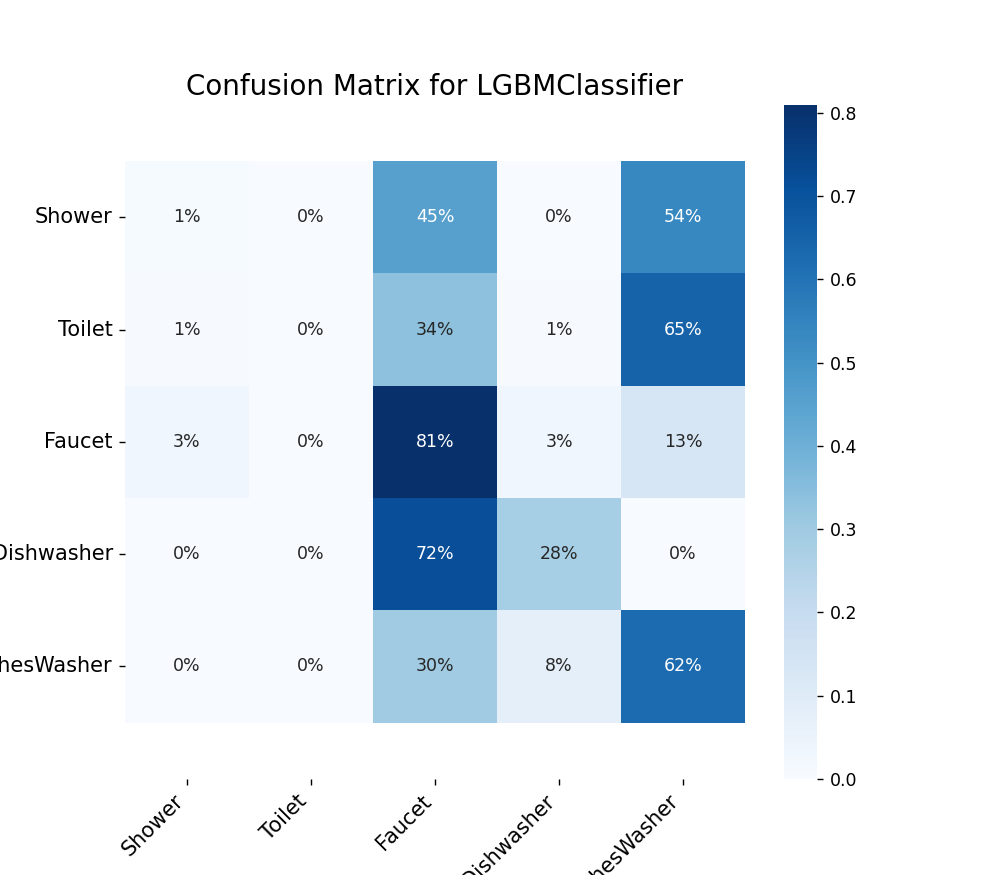

In [ ]:
identify_water_enduse('../src/random_shuffle.csv',loaded_model)

## 2. Shuffle Hours Inside the Day

In [ ]:
hour=int(len(data)/6/60)
step=6*60

In [ ]:
data.head()
days=hour/24
L=[]
i=0
Sdata=data.iloc[:,0:]
Sdb2=data.iloc[0:1,0:]
for k in range(hour):
  test=Sdata.iloc[step*(i):step*(i+1),:]
  #print(test['TOTAL'].sum())
  L.append(test)
  test=test.sample(frac=1) #Shuffle
  #print(test)
  i=i+1
  Sdb2=Sdb2.append(test)
Sdb2=Sdb2.iloc[1:,:]
Sdb2

,TS,Toilet,Shower,Faucet,ClothesWasher,Dishwasher,Bathtub,TOTAL
81,00:13:40,0.0,0.0,0.0,0.0,0.0,0.0,0.0
350,00:58:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186,00:31:10,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,00:04:10,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,00:13:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
241669,23:18:20,0.0,0.0,0.0,0.0,0.0,0.0,0.0
241918,23:59:50,0.0,0.0,0.0,0.0,0.0,0.0,0.0
241633,23:12:20,0.0,0.0,0.0,0.0,0.0,0.0,0.0
241783,23:37:20,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
i=0
month=[]
db2=data.iloc[0:1,0:]
for j in range(28):
  day=L[24*j:24*(j+1)]
  #i=i+1
  #shuffle day
  day=shuffle(day)
  for z in range(len(day)):
    db2=db2.append(day[z])
    # print(db['TOTAL'].sum())

#for a in range(len(month)):
#  db.append(month[a])

db2=db2.iloc[1:,:]
print(len(day))
print(len(month))
print(len(db2))

24
0
241920


In [ ]:
db2=db2.reset_index()

<IPython.core.display.Javascript object>


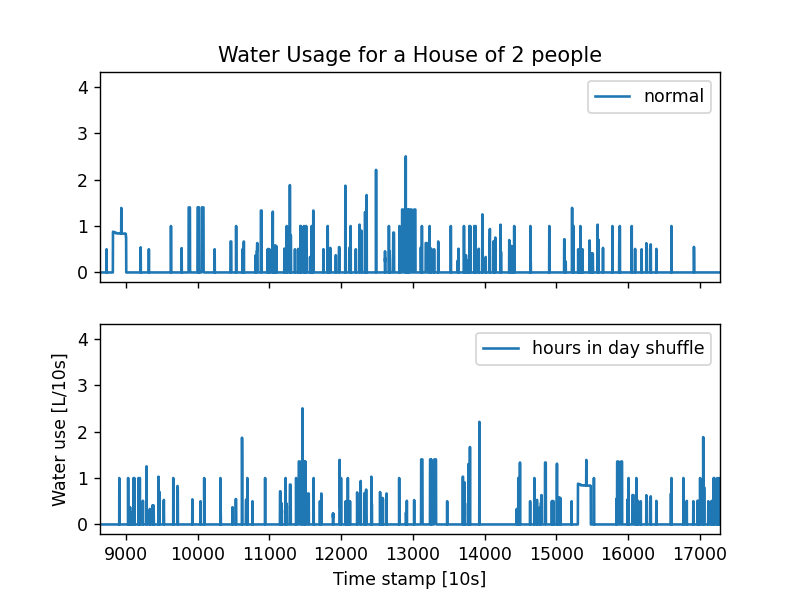

In [ ]:
import matplotlib.dates as mdates
f, (ax1, ax2) = plt.subplots(2,1, sharex=True)
ax1.plot(data['TOTAL'], label='normal')
ax1.set_title('Water Usage for a House of 2 people')
ax2.plot(db2['TOTAL'], label='hours in day shuffle')
ax1.set_xlim([24*360, 48*360]) # zoom to a 24-hour range. here: 0-24 o'clock of the second day
ax2.set_xlabel('Time stamp [10s]')
ax2.set_ylabel('Water use [L/10s]')
ax1.legend(loc="upper right")
ax2.legend(loc="upper right")

In [ ]:
db2.to_csv('In_the_day.csv')

               precision    recall  f1-score   support

       Toilet       0.19      0.51      0.27        97
       Shower       0.02      0.09      0.03        23
       Faucet       1.00      0.58      0.73      1810
ClothesWasher       0.28      0.90      0.43        42
   Dishwasher       0.42      0.91      0.58       350

     accuracy                           0.63      2322
    macro avg       0.38      0.60      0.41      2322
 weighted avg       0.85      0.63      0.68      2322

f1_score=0.626


<IPython.core.display.Javascript object>


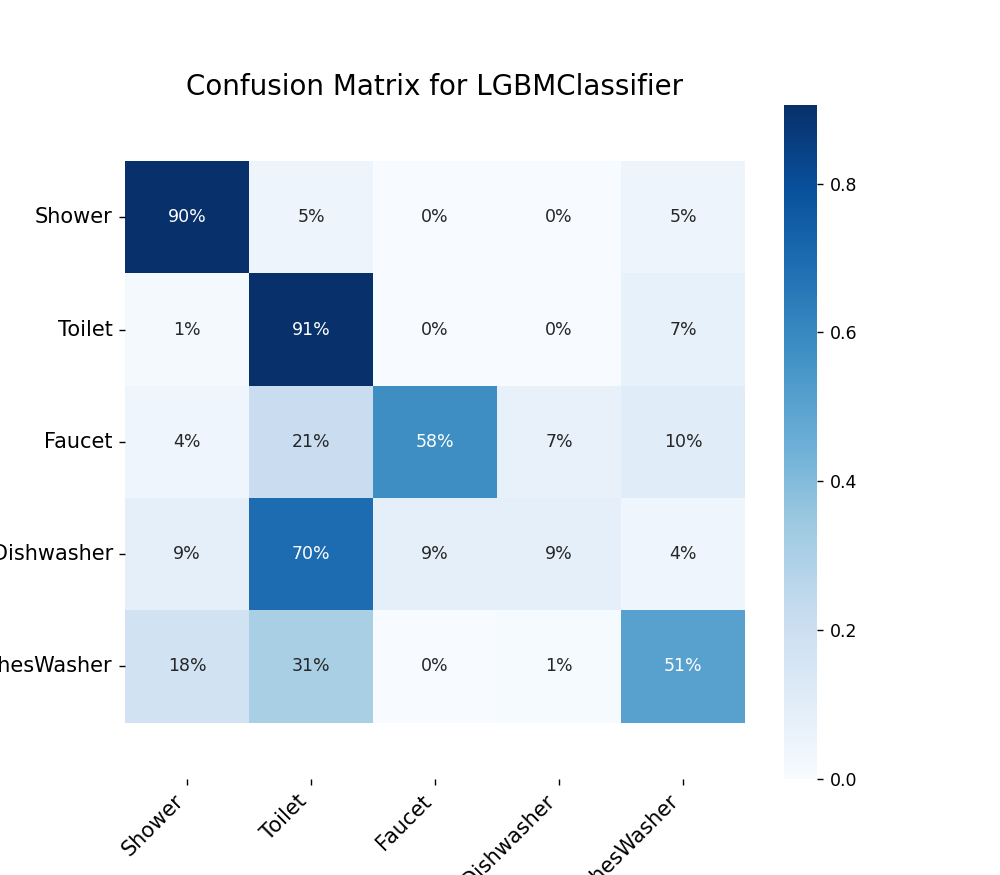

In [ ]:
identify_water_enduse('../src/In_the_day.csv',loaded_model)

## 3. Shuffle Inside the Single Hours

In [ ]:
hour=int(len(data)/6/60)
step=6*60

In [ ]:
data.head()
i=0
Sdata=data.iloc[:,0:]
Sdb3=data.iloc[0:1,0:]
for k in range(hour):
  test=Sdata.iloc[step*(i):step*(i+1),:]
  test=test.sample(frac=1) #Shuffle
  #print(test)
  i=i+1
  Sdb3=Sdb3.append(test)
Sdb3=Sdb3.iloc[1:,:]
Sdb3=Sdb3.reset_index()
Sdb3

,index,TS,Toilet,Shower,Faucet,ClothesWasher,Dishwasher,Bathtub,TOTAL
0,115,00:19:20,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,73,00:12:20,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2,50,00:08:30,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
3,256,00:42:50,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4,144,00:24:10,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
241915,241646,23:14:30,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
241916,241872,23:52:10,0.0,1.160733,0.0,0.0,0.0,0.0,1.160733
241917,241665,23:17:40,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
241918,241836,23:46:10,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


<IPython.core.display.Javascript object>


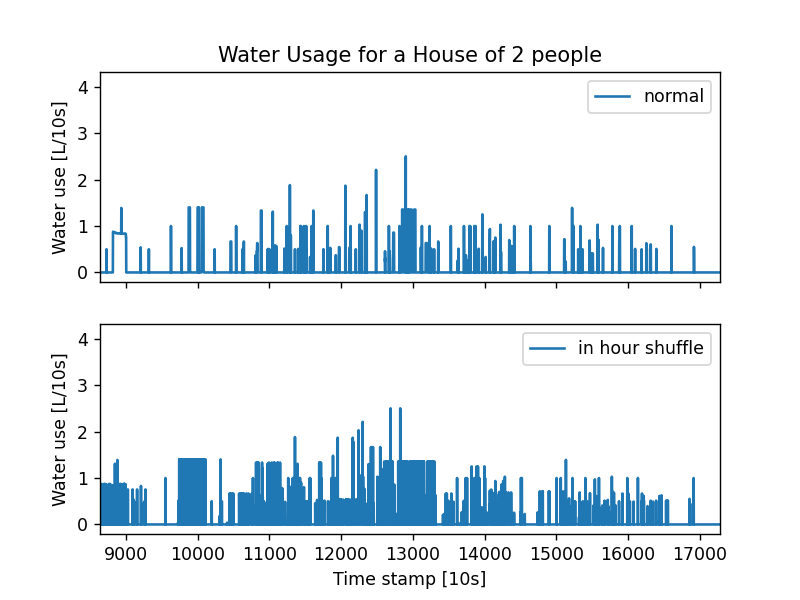

In [ ]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True)
ax1.plot(data['TOTAL'], label='normal')
ax1.set_title('Water Usage for a House of 2 people')
ax2.plot(Sdb3['TOTAL'], label='in hour shuffle')
ax1.set_xlim([24*360, 48*360]) # zoom to a 24-hour range. here: 0-24 o'clock of the second day
ax1.set_ylabel('Water use [L/10s]')
ax2.set_xlabel('Time stamp [10s]')
ax2.set_ylabel('Water use [L/10s]')
ax1.legend(loc="upper right")
ax2.legend(loc="upper right")

<IPython.core.display.Javascript object>


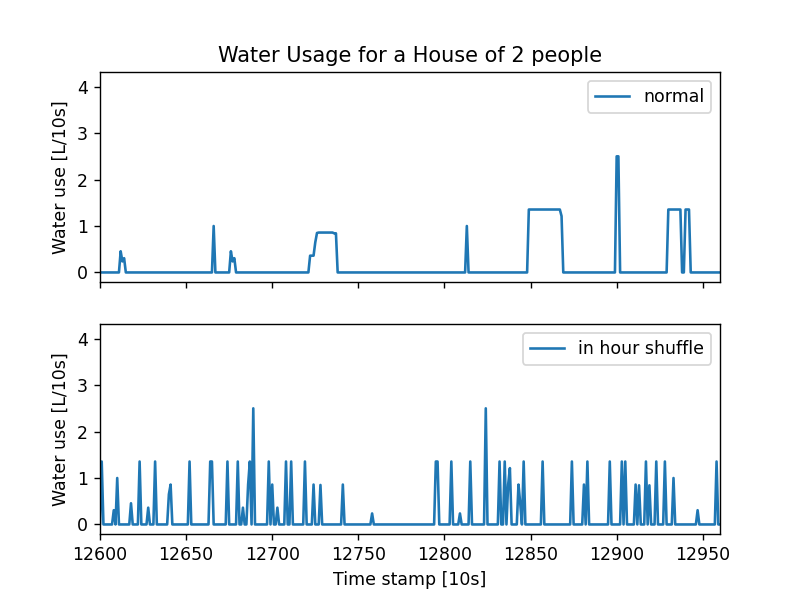

In [ ]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True)
ax1.plot(data['TOTAL'], label='normal')
ax1.set_title('Water Usage for a House of 2 people')
ax2.plot(Sdb3['TOTAL'], label='in hour shuffle')
ax1.set_xlim([35*360, 36*360]) # zoom to a 1-hour range. here: 11-12 o'clock of the second day
ax1.set_ylabel('Water use [L/10s]')
ax2.set_xlabel('Time stamp [10s]')
ax2.set_ylabel('Water use [L/10s]')
ax1.legend(loc="upper right")
ax2.legend(loc="upper right")

In [ ]:
Sdb3.to_csv('In_the_hour.csv')

               precision    recall  f1-score   support

       Toilet       0.20      0.56      0.29      1136
       Shower       0.11      0.23      0.15       154
       Faucet       0.76      0.77      0.76      5855
ClothesWasher       0.35      0.18      0.24      1841
   Dishwasher       0.00      0.00      0.00      1480

     accuracy                           0.53     10466
    macro avg       0.28      0.35      0.29     10466
 weighted avg       0.51      0.53      0.50     10466

f1_score=0.528


<IPython.core.display.Javascript object>


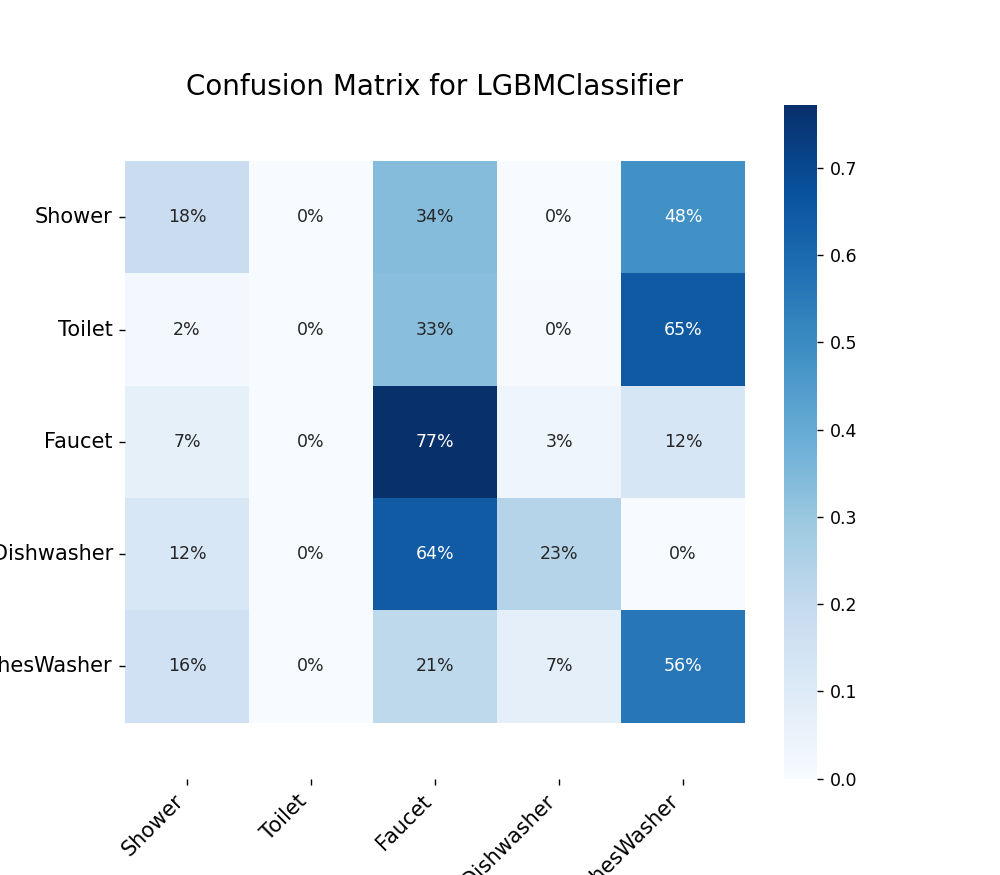

In [ ]:
identify_water_enduse('../src/In_the_hour.csv',loaded_model)

## 4. Shuffle Days and Hours

In [ ]:
hour=int(len(data)/6/60)
step=6*60
#random.seed(42)

In [ ]:
#NOW HERE YOU ARE TRYING TO SHUFFLE THE HOURS INSIDE EVERY DAY
data.head()
days=hour/24
L=[]
i=0
Sdata=data.iloc[:,0:]
Sdb4=data.iloc[0:1,0:]
for k in range(hour):
  test=Sdata.iloc[step*(i):step*(i+1),:]
  #print(test['TOTAL'].sum())

  test=test.sample(frac=1) #Shuffle
  L.append(test)
  #print(test)
  i=i+1
  Sdb4=Sdb4.append(test)
Sdb4=Sdb4.iloc[1:,:]
Sdb4

,TS,Toilet,Shower,Faucet,ClothesWasher,Dishwasher,Bathtub,TOTAL
307,00:51:20,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
271,00:45:20,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
43,00:07:20,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
225,00:37:40,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
53,00:09:00,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...
241812,23:42:10,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
241912,23:58:50,0.0,1.097650,0.0,0.0,0.0,0.0,1.097650
241890,23:55:10,0.0,1.160733,0.0,0.0,0.0,0.0,1.160733
241700,23:23:30,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


In [ ]:
i=0
month=[]
db4=data.iloc[0:1,0:]
for j in range(28):
  day=L[24*j:24*(j+1)]
  #i=i+1
  #shuffle day
  day=shuffle(day)
  for z in range(len(day)):
    db4=db4.append(day[z])
    #print(db['TOTAL'].sum())

#for a in range(len(month)):
#  db.append(month[a])

db4=db4.iloc[1:,:]
print(len(day))
print(len(month))
print(len(db4))

24
0
241920


In [ ]:
db4=db4.reset_index()

<IPython.core.display.Javascript object>


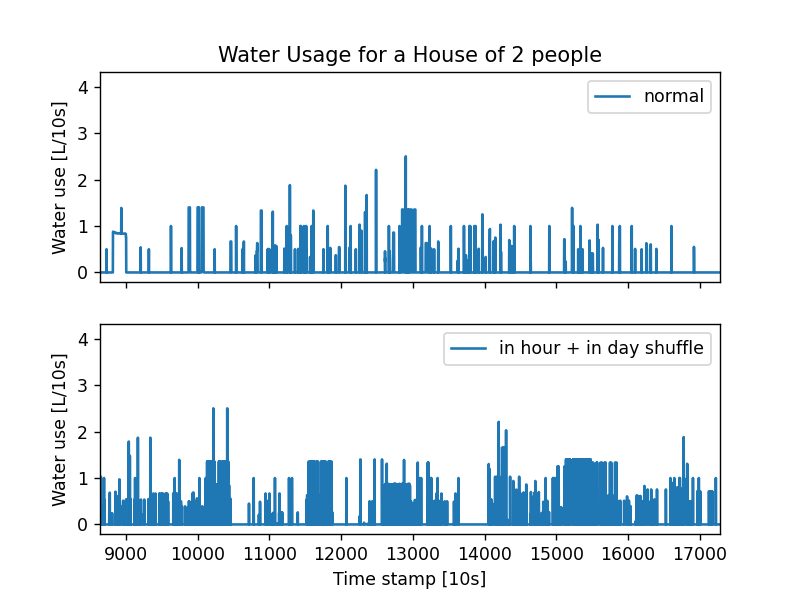

In [ ]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True)
ax1.plot(data['TOTAL'], label='normal')
ax1.set_title('Water Usage for a House of 2 people')
ax2.plot(db4['TOTAL'], label='in hour + in day shuffle')
ax1.set_xlim([24*360, 48*360]) # zoom to a 24-hour range. here: 0-24 o'clock of the second day
ax1.set_ylabel('Water use [L/10s]')
ax2.set_xlabel('Time stamp [10s]')
ax2.set_ylabel('Water use [L/10s]')
ax1.legend(loc="upper right")
ax2.legend(loc="upper right")

In [ ]:
db4.to_csv('day_and_hour.csv')

               precision    recall  f1-score   support

       Toilet       0.18      0.50      0.26      1115
       Shower       0.08      0.25      0.12       157
       Faucet       0.73      0.54      0.62      5827
ClothesWasher       0.34      0.19      0.25      1822
   Dishwasher       0.08      0.08      0.08      1480

     accuracy                           0.41     10401
    macro avg       0.28      0.31      0.27     10401
 weighted avg       0.50      0.41      0.43     10401

f1_score=0.405


<IPython.core.display.Javascript object>


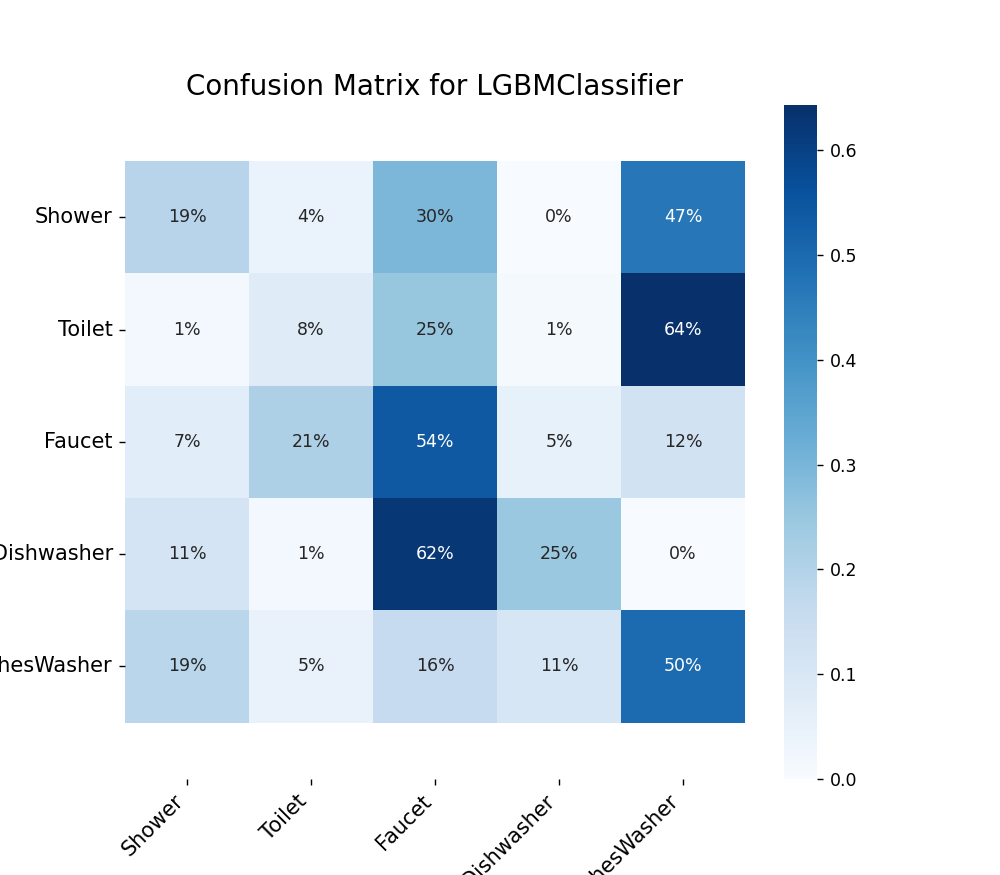

In [ ]:
identify_water_enduse('../src/day_and_hour.csv',loaded_model)

## 5. Shuffle Days and Hours

In [ ]:
hour=int(len(data)/6/60)
# 3 hour step
step=1080

In [ ]:
#NOW HERE YOU ARE TRYING TO SHUFFLE THE HOURS INSIDE EVERY DAY
data.head()
days=hour/24
L=[]
i=0
Sdata=data.iloc[:,0:]
Sdb5=data.iloc[0:1,0:]
for k in range(hour):
  test=Sdata.iloc[step*(i):step*(i+1),:]
  test=test.sample(frac=1) #Shuffle
  L.append(test)
  #print(test)
  i=i+1
  Sdb5=Sdb5.append(test)
Sdb5=Sdb5.iloc[1:,:]
Sdb5

,TS,Toilet,Shower,Faucet,ClothesWasher,Dishwasher,Bathtub,TOTAL
312,00:52:10,0.0,0.0,0.0,0.0,0.0,0.0,0.0
490,01:21:50,0.0,0.0,0.0,0.0,0.0,0.0,0.0
458,01:16:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
235,00:39:20,0.0,0.0,0.0,0.0,0.0,0.0,0.0
532,01:28:50,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
241767,23:34:40,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240896,21:09:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
241396,22:32:50,0.0,0.0,0.0,0.0,0.0,0.0,0.0
241812,23:42:10,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
i=0
month=[]
db5=data.iloc[0:1,0:]
for j in range(28):
  day=L[72*j:72*(j+1)]
  #i=i+1
  #shuffle day
  day=shuffle(day)
  for z in range(len(day)):
    db5=db5.append(day[z])
    #print(db['TOTAL'].sum())

#for a in range(len(month)):
#  db.append(month[a])

db5=db5.iloc[1:,:]
print(len(day))
print(len(month))
print(len(db5))

0
0
241920


In [ ]:
db5=db5.reset_index()

<IPython.core.display.Javascript object>


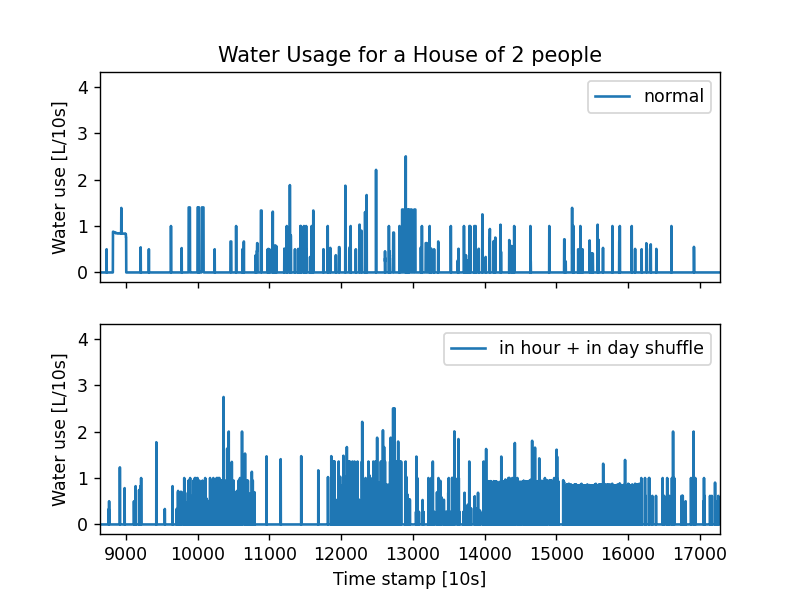

In [ ]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True)
ax1.plot(data['TOTAL'], label='normal')
ax1.set_title('Water Usage for a House of 2 people')
ax2.plot(db5['TOTAL'], label='in hour + in day shuffle')
ax1.set_xlim([24*360, 48*360]) # zoom to a 24-hour range. here: 0-24 o'clock of the second day
ax1.set_ylabel('Water use [L/10s]')
ax2.set_xlabel('Time stamp [10s]')
ax2.set_ylabel('Water use [L/10s]')
ax1.legend(loc="upper right")
ax2.legend(loc="upper right")

In [ ]:
db5.to_csv('day_and_hour_3groups.csv')

               precision    recall  f1-score   support

       Toilet       0.21      0.60      0.31      1280
       Shower       0.14      0.27      0.19       170
       Faucet       0.72      0.79      0.76      5958
ClothesWasher       0.25      0.07      0.11      2126
   Dishwasher       0.00      0.00      0.00      1480

     accuracy                           0.51     11014
    macro avg       0.27      0.35      0.27     11014
 weighted avg       0.47      0.51      0.47     11014

f1_score=0.515


<IPython.core.display.Javascript object>


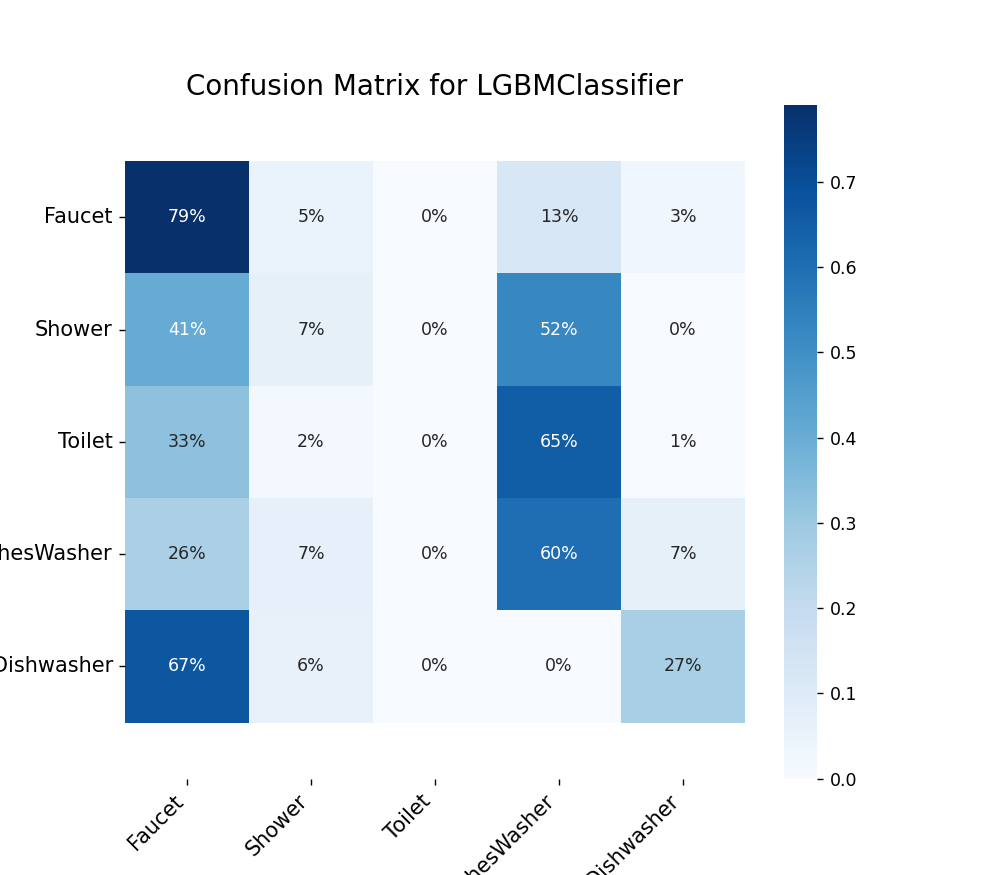

In [ ]:
identify_water_enduse('../src/day_and_hour_3groups.csv',loaded_model)

## Final Graphs

<IPython.core.display.Javascript object>


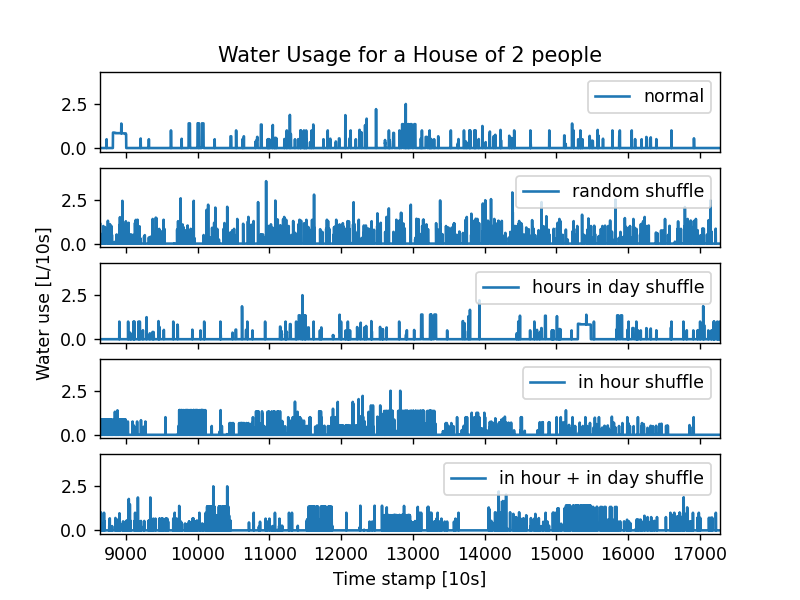

In [ ]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1, sharex=True)
ax1.plot(data['TOTAL'], label='normal')
ax1.set_title('Water Usage for a House of 2 people')
ax2.plot(Sdb1['TOTAL'], label='random shuffle')
ax3.plot(db2['TOTAL'], label='hours in day shuffle')
ax4.plot(Sdb3['TOTAL'], label='in hour shuffle')
ax5.plot(db4['TOTAL'], label='in hour + in day shuffle')
ax1.set_xlim([24*360, 48*360]) # zoom to a 24-hour range. here: 0-24 o'clock of the second day
ax3.set_ylabel('Water use [L/10s]')
ax5.set_xlabel('Time stamp [10s]')
ax1.legend(loc="upper right")
ax2.legend(loc="upper right")
ax3.legend(loc="upper right")
ax4.legend(loc="upper right")
ax5.legend(loc="upper right")